In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Loading the DataSet

In [37]:
data = pd.read_csv("horseRacing - horseRacing.csv")
data.head()

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
0,495886,565129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.71,...,-1.16,0.0,1.87,1.87,-2.07,-1.96,-1.95,-0.30,8.0,17.0
1,495886,607093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,...,0.77,0.0,0.00,0.00,0.00,0.00,0.00,0.07,5.0,26.0
2,495886,637337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.97,...,-1.16,0.0,0.00,0.00,0.48,0.44,0.39,-0.86,7.0,17.0
3,495886,659819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,0.77,0.0,0.00,0.00,0.32,1.09,0.78,-0.86,1.0,4.0
4,495886,661530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,...,0.77,0.0,0.00,0.00,0.00,0.00,0.39,1.17,4.0,7.0


Cleaning the Data

In [38]:
#checking for null-values
print("Null Values : \n " , data.isna().sum())

#Dropping the null values
data = data.dropna()

Null Values : 
  race_id              0
horse_id             0
1-101            64722
1-102            64602
1-103            64641
                 ...  
4-115            10352
4-116            11402
4-117             9470
calc_position        4
price                0
Length: 64, dtype: int64


In [16]:
print("After droppping null values")
data.isna().sum()

After droppping null values


race_id          0
horse_id         0
1-101            0
1-102            0
1-103            0
                ..
4-115            0
4-116            0
4-117            0
calc_position    0
price            0
Length: 64, dtype: int64

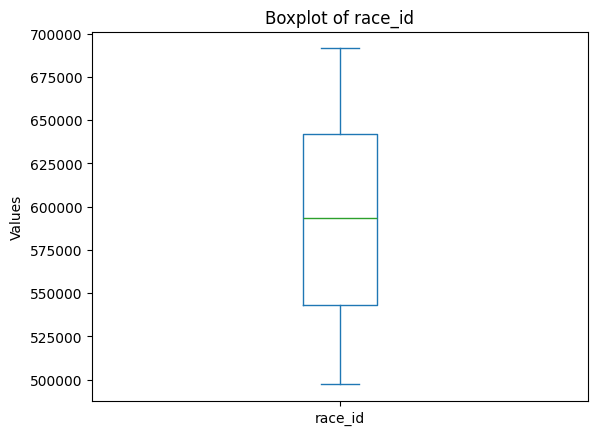

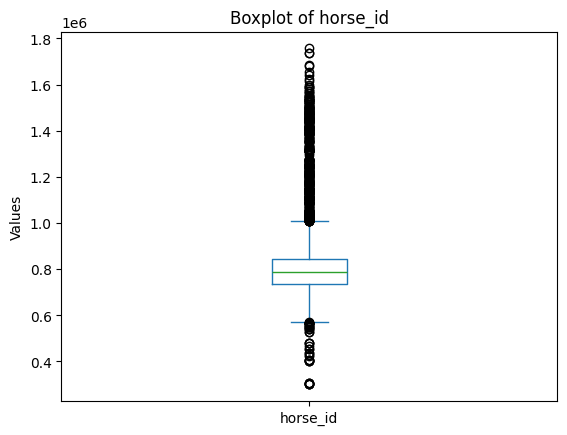

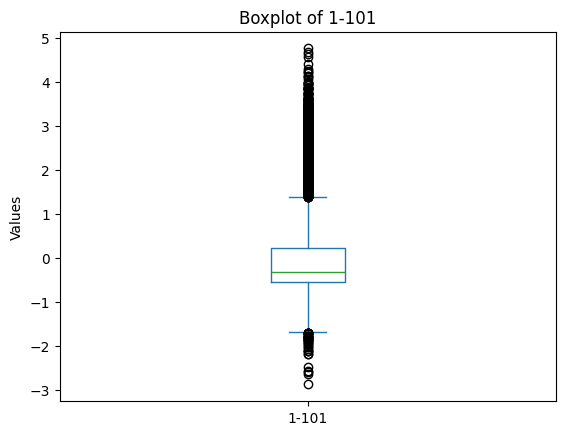

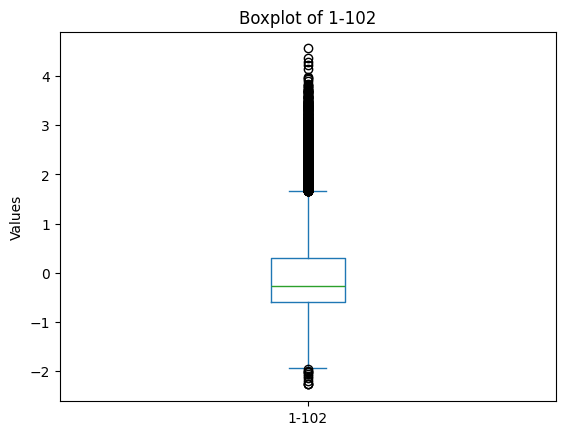

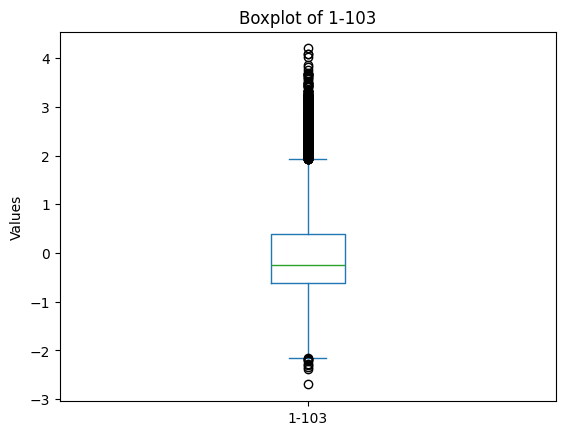

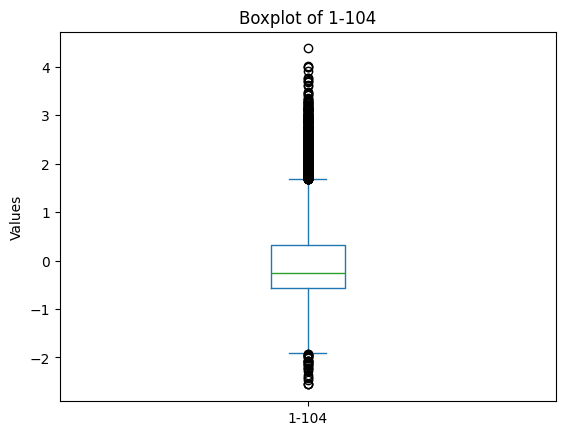

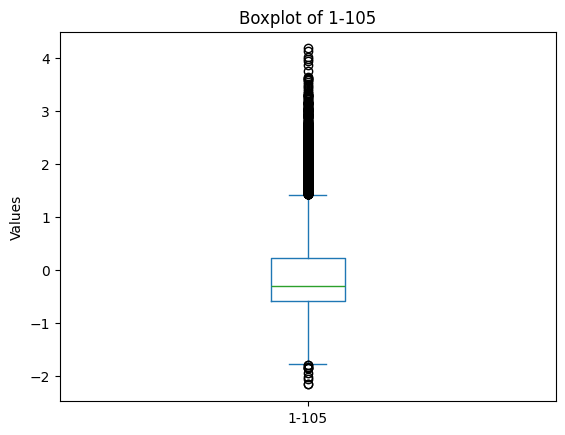

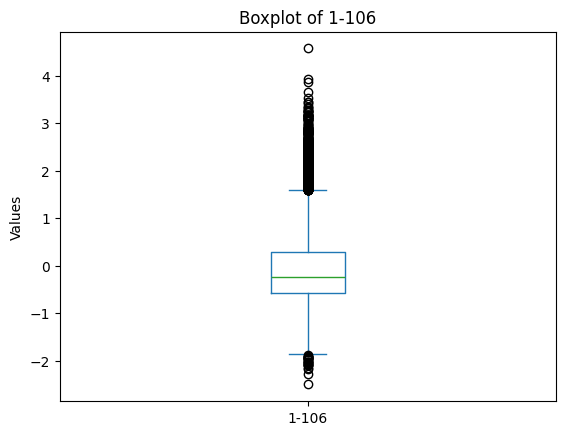

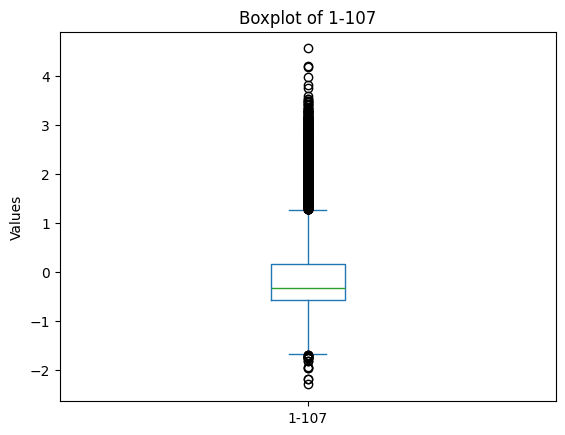

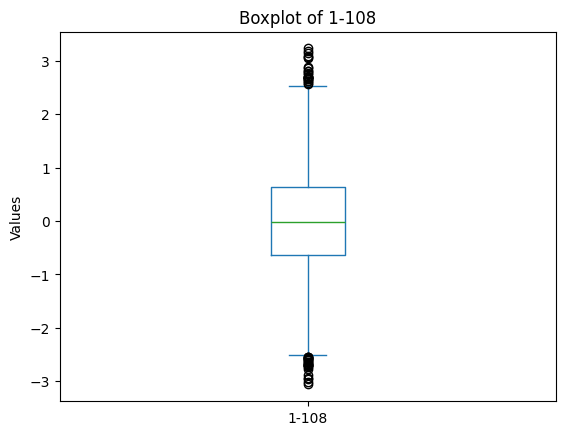

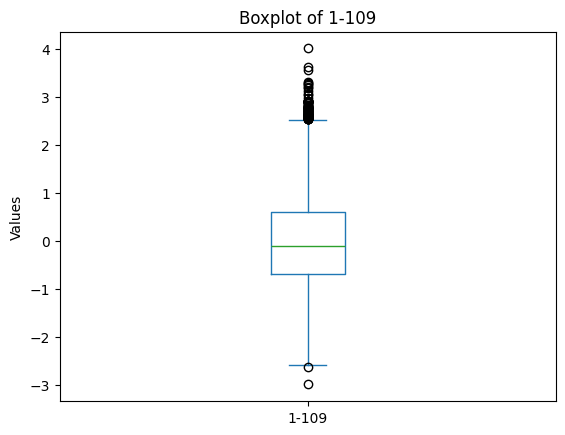

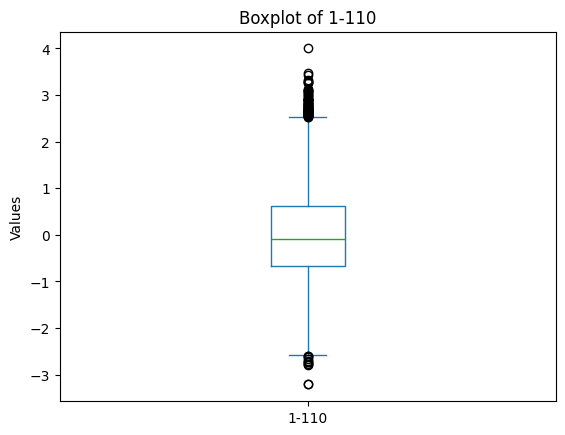

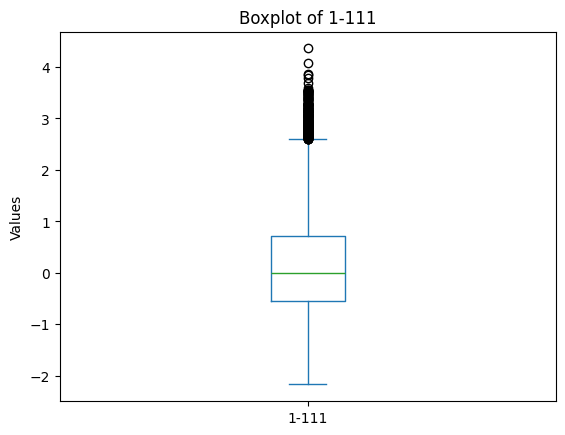

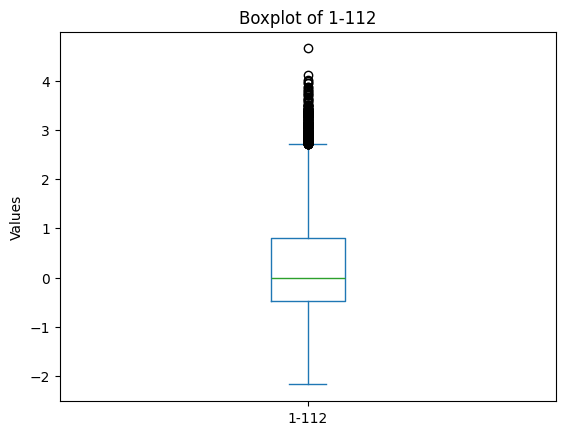

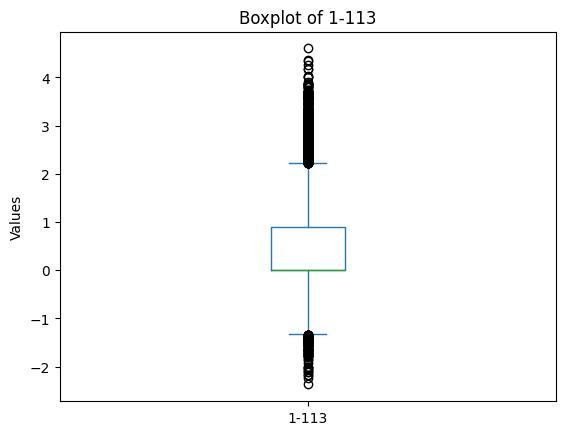

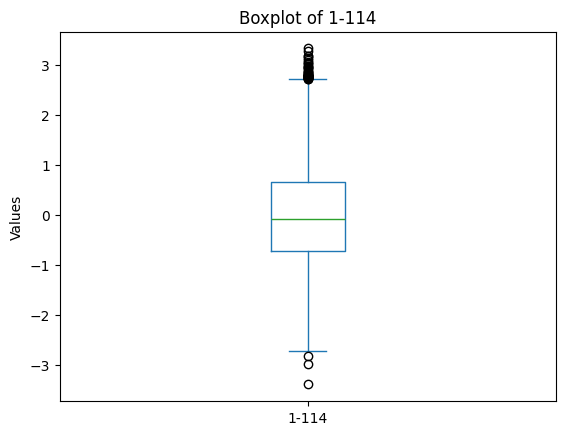

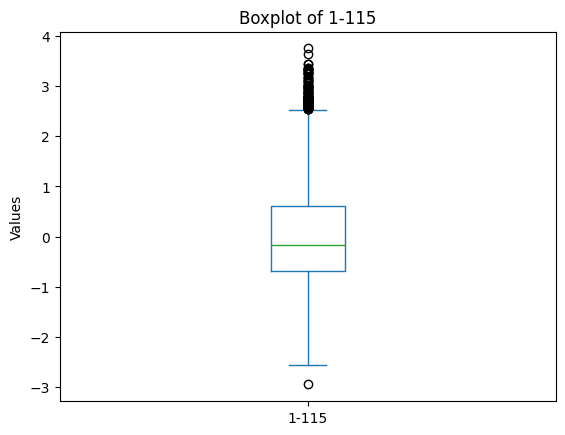

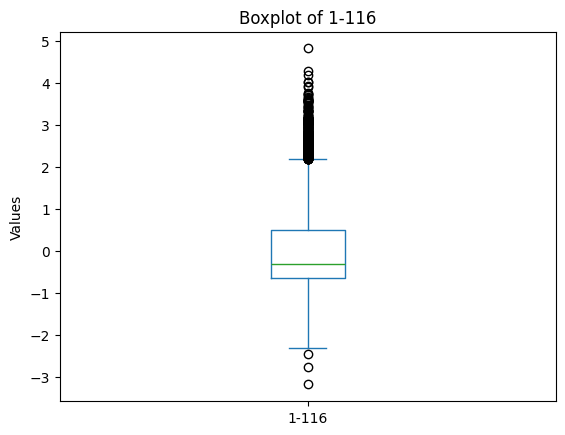

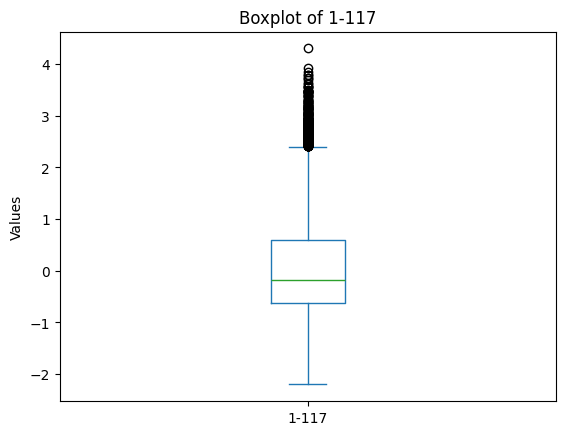

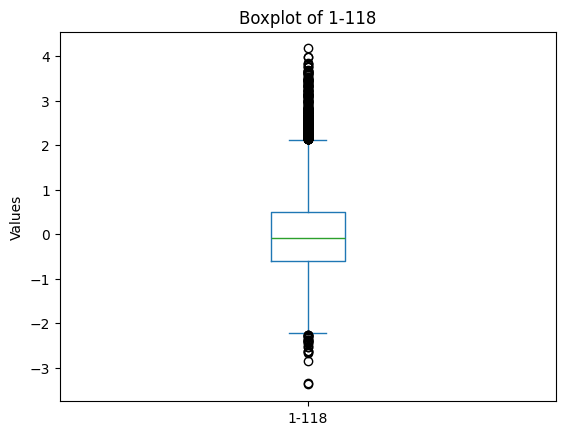

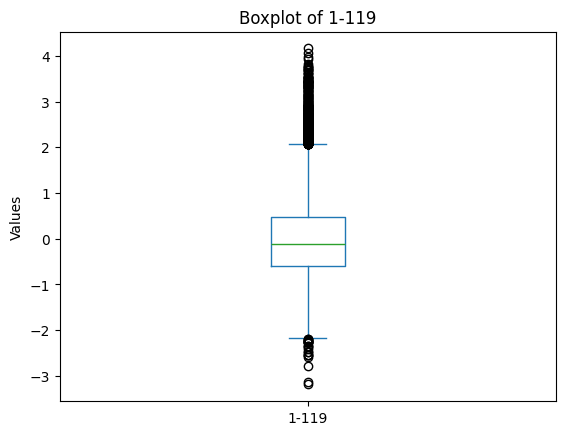

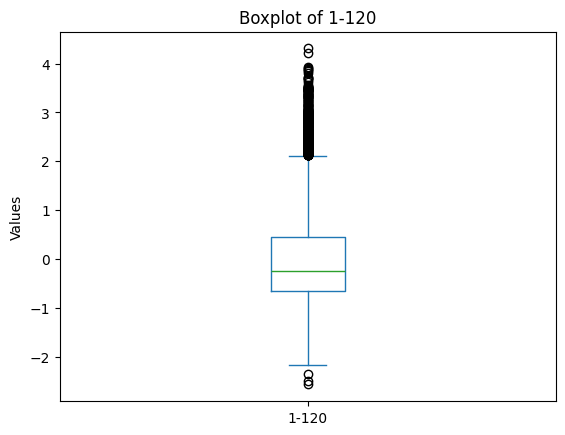

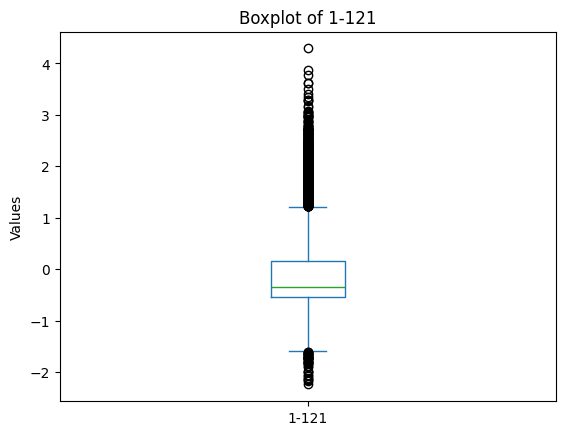

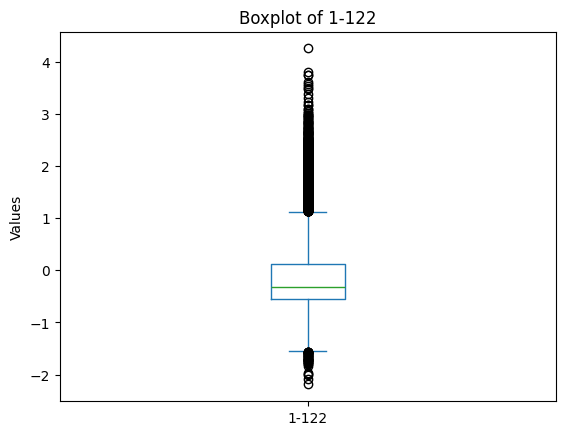

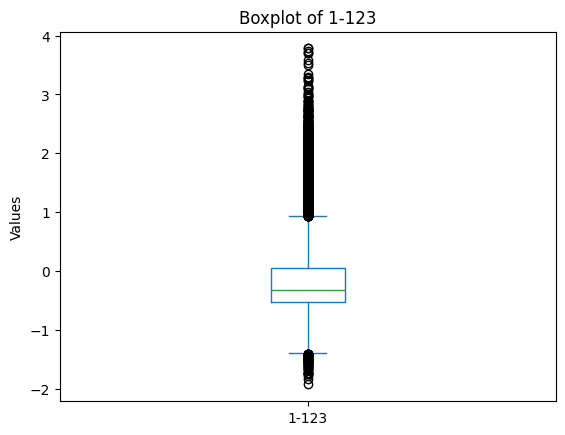

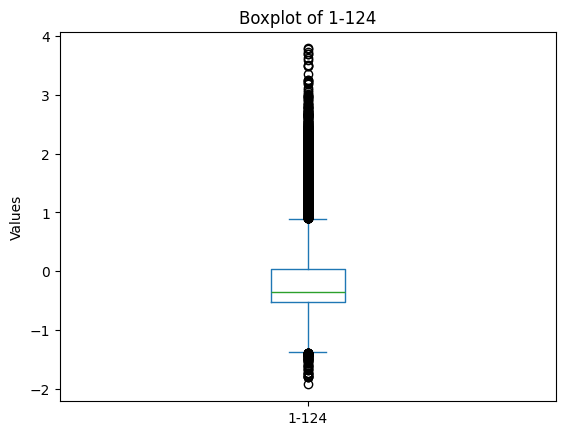

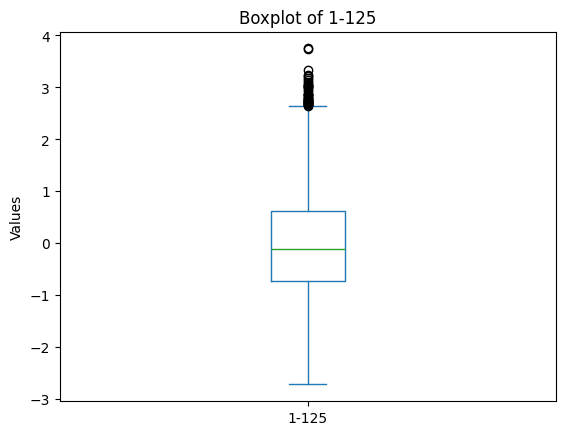

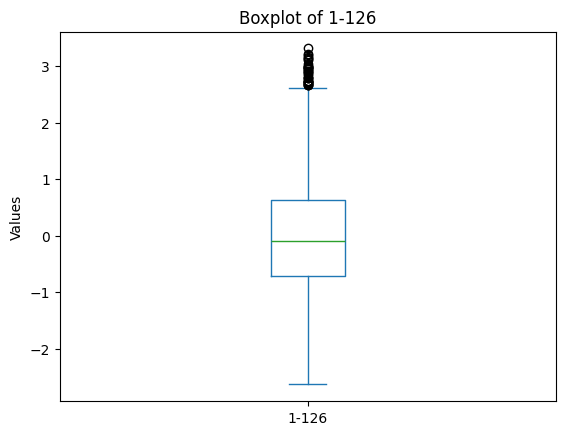

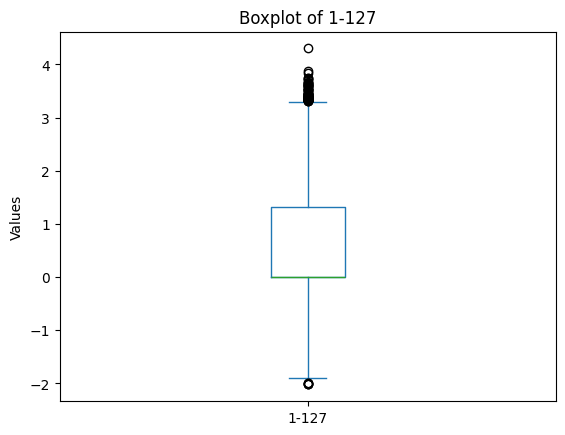

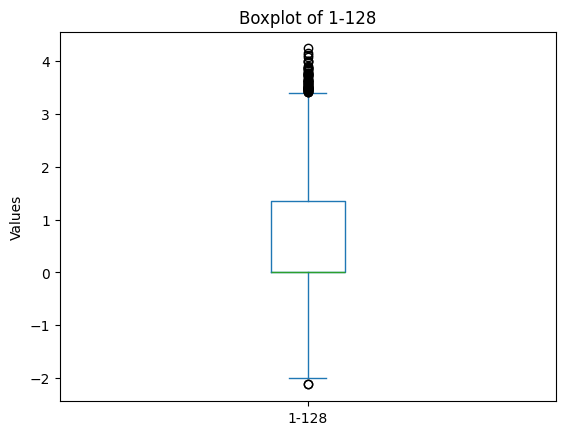

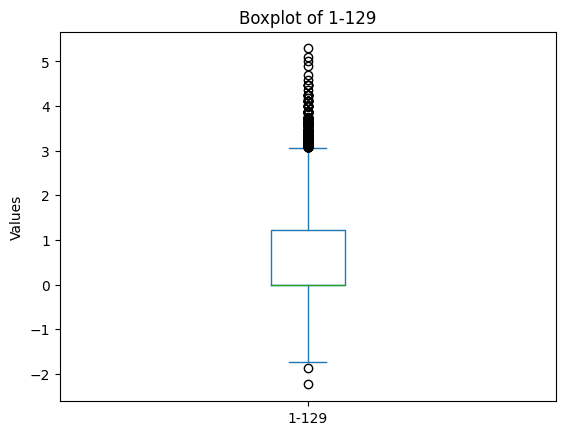

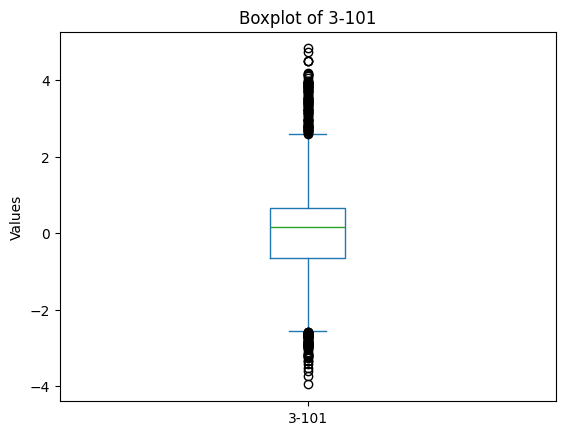

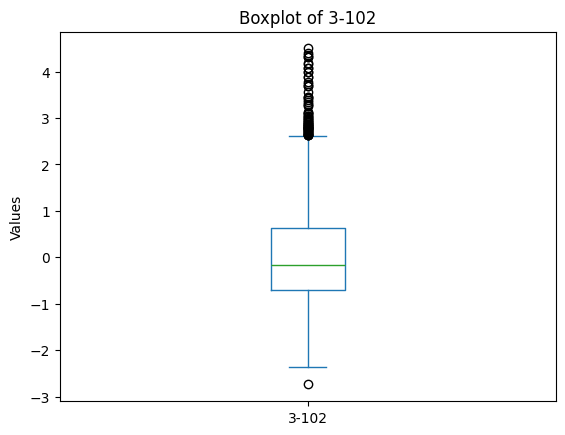

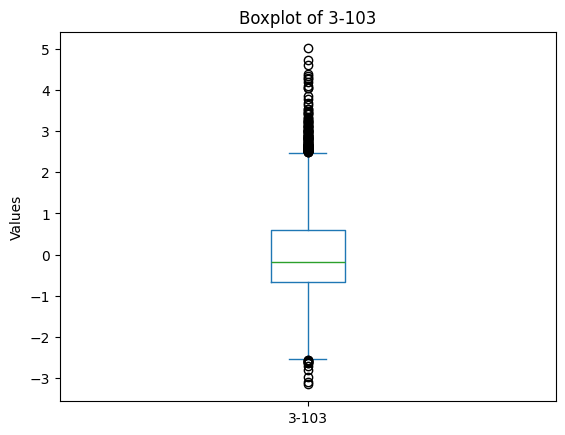

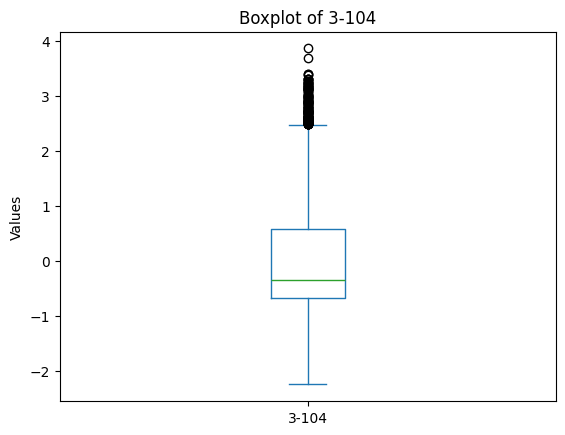

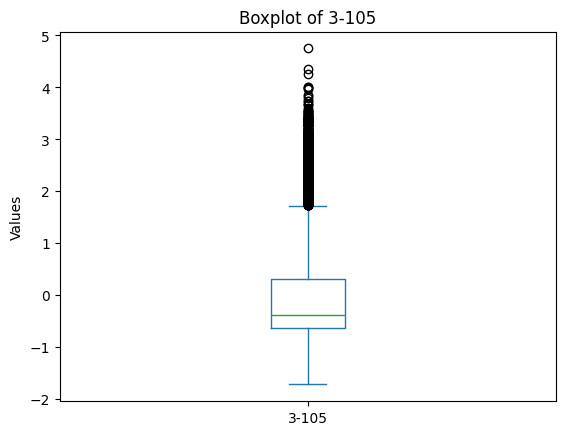

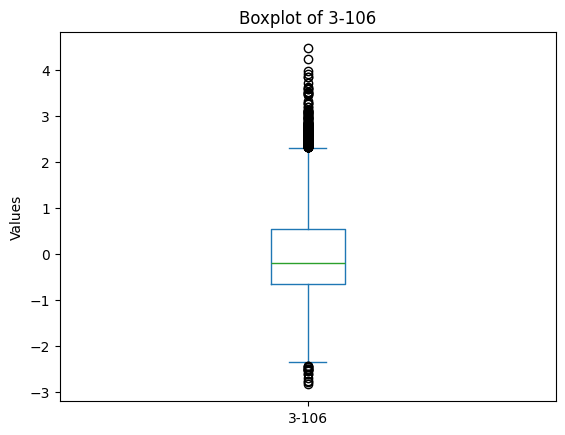

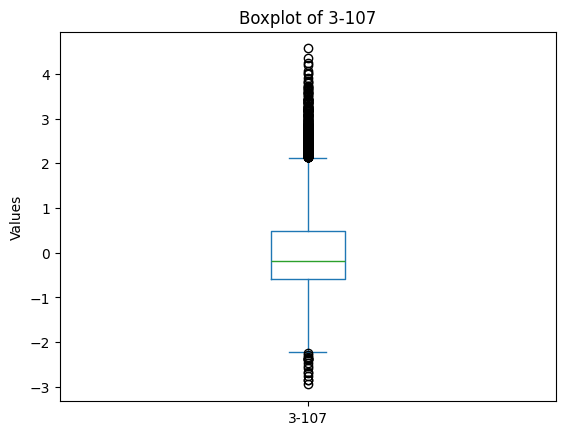

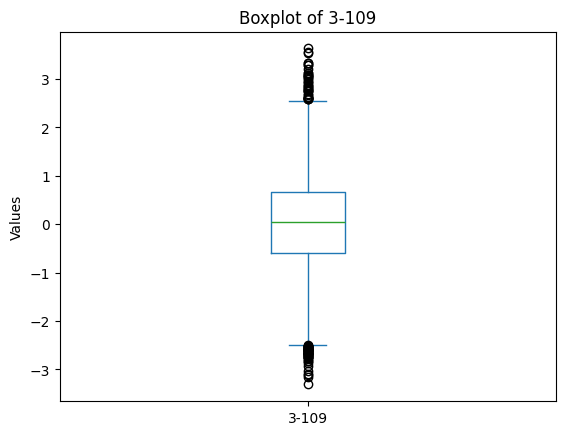

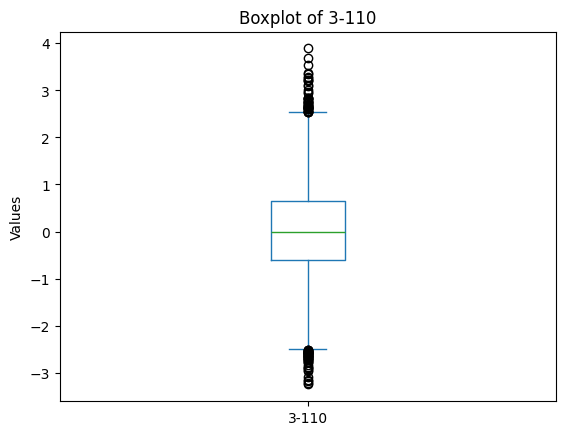

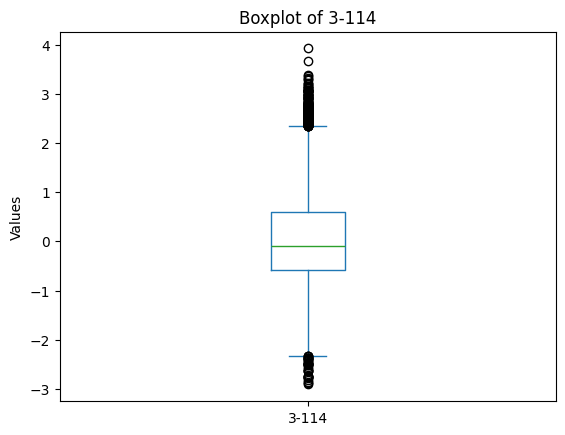

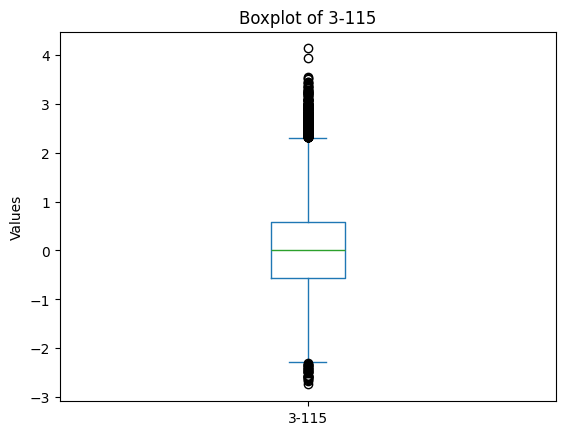

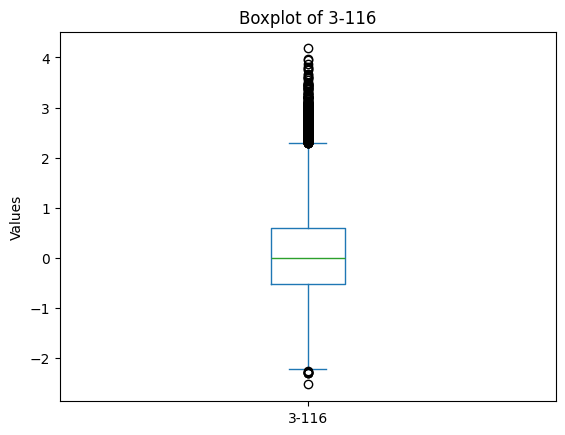

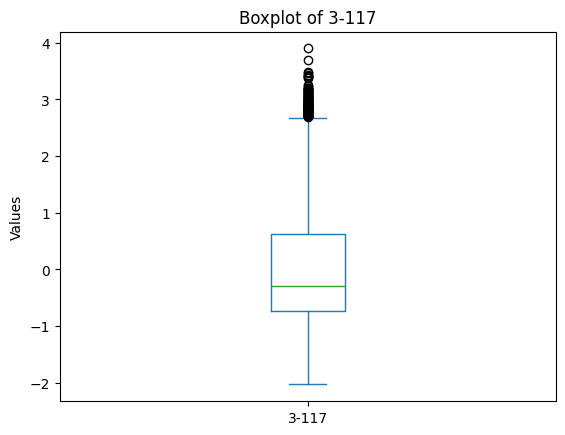

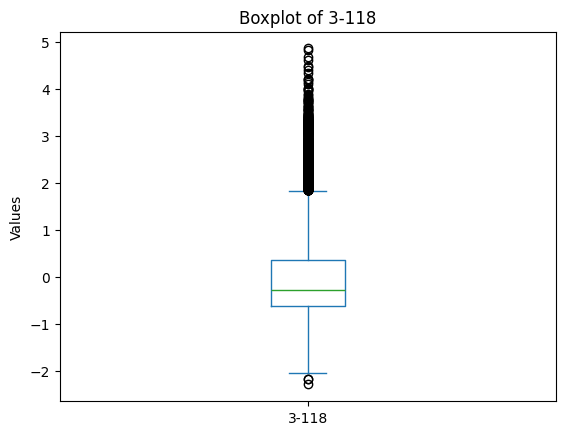

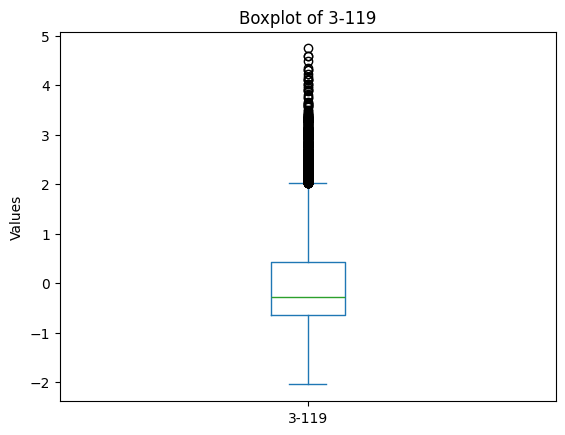

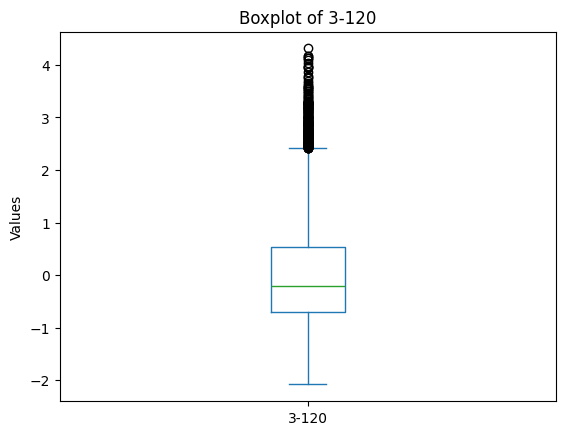

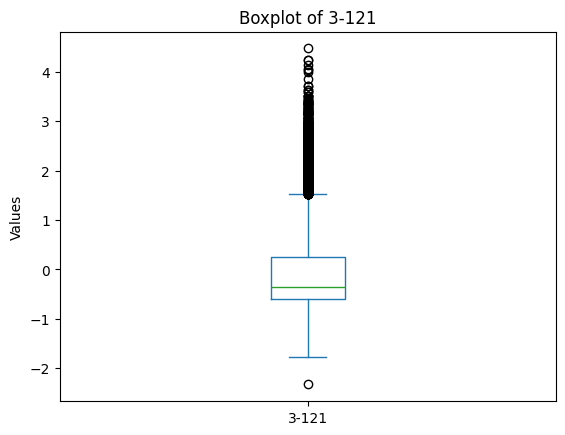

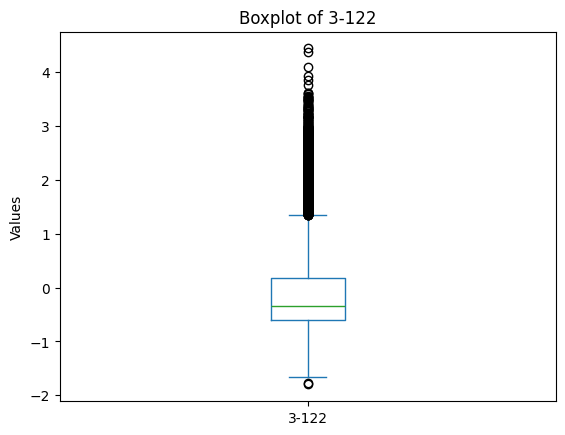

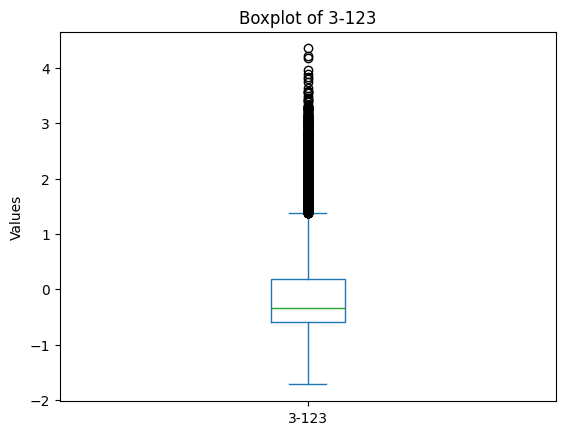

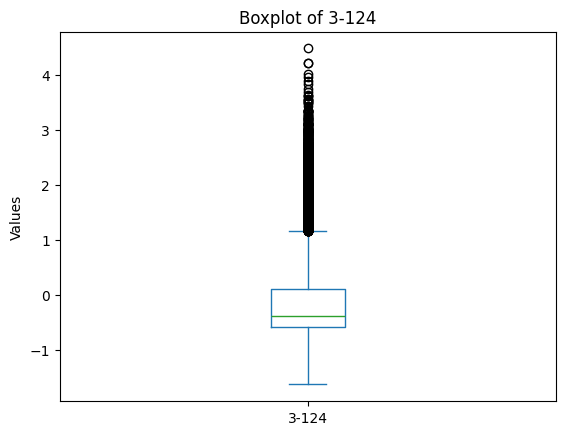

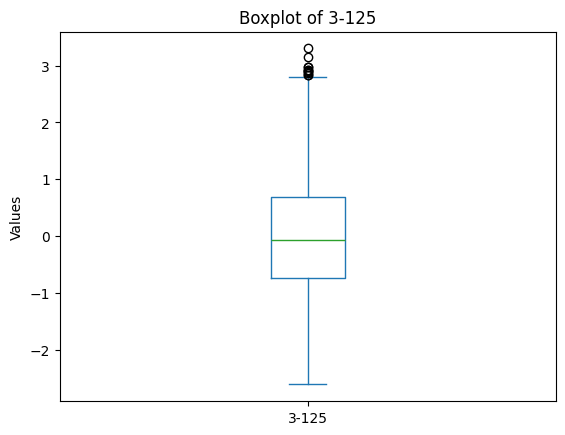

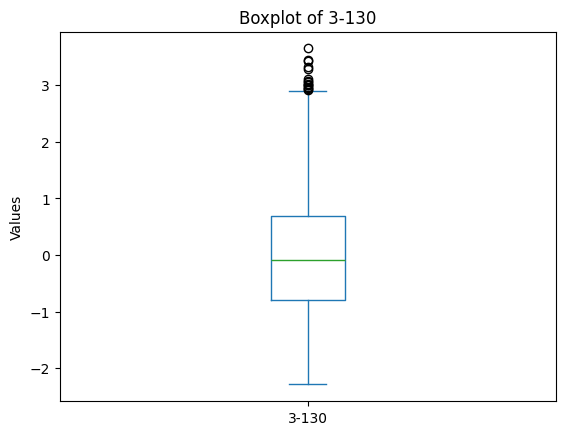

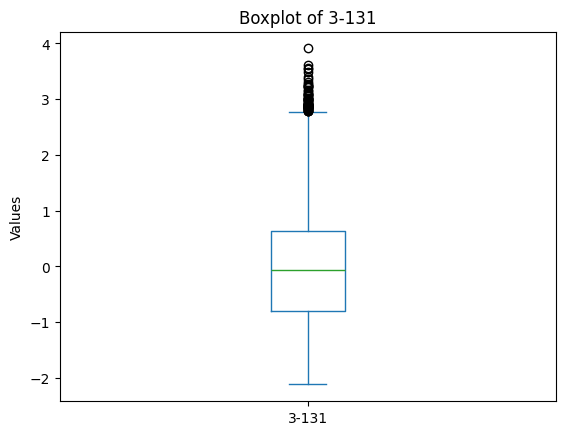

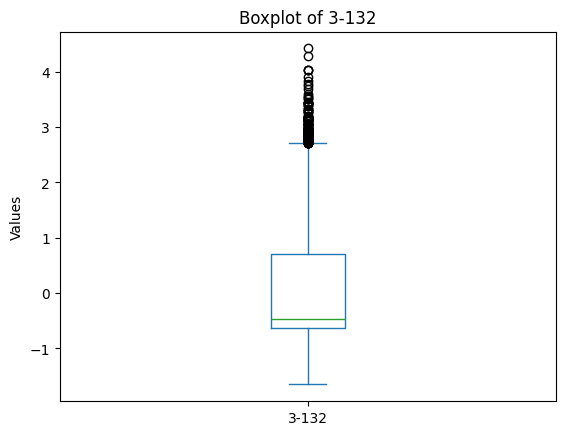

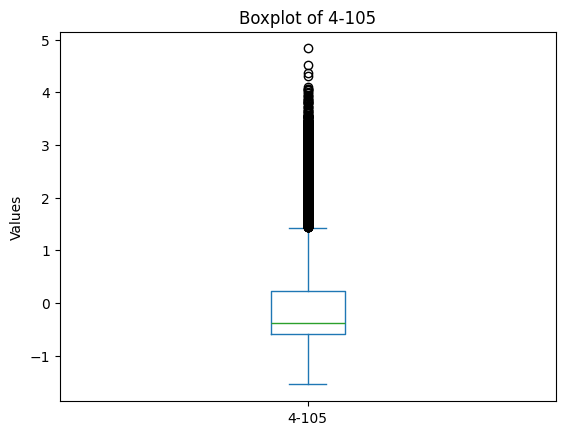

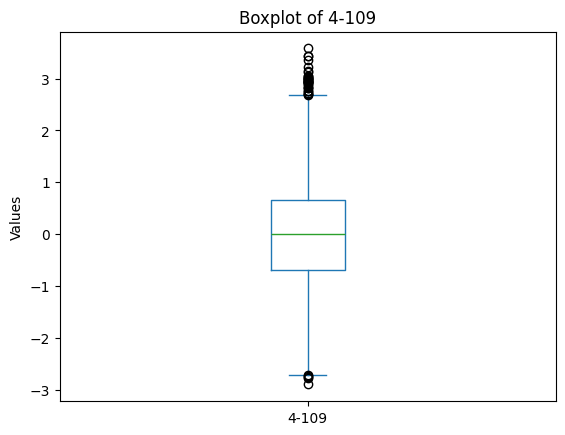

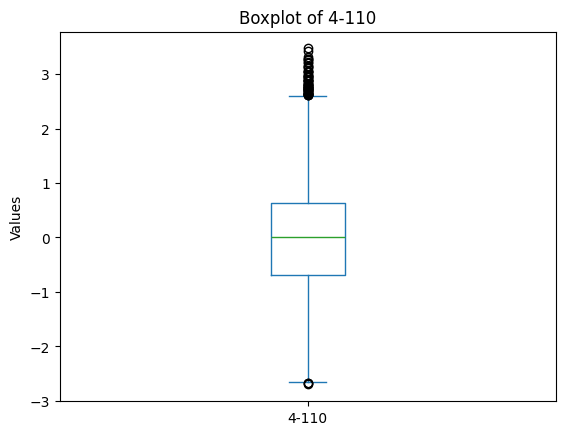

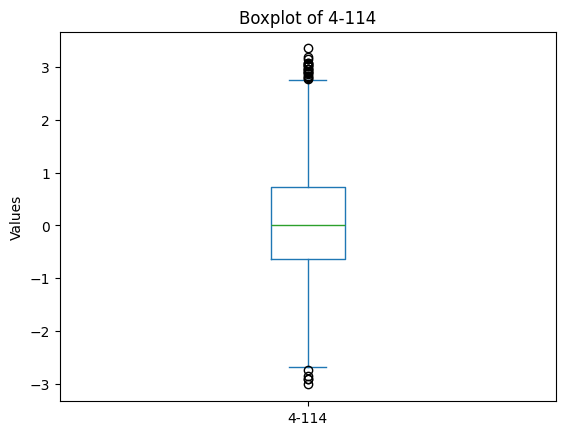

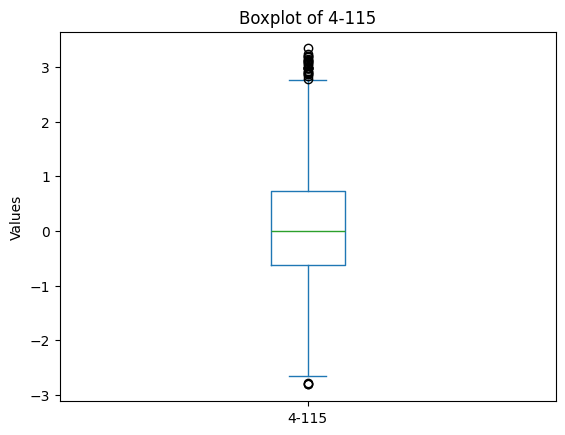

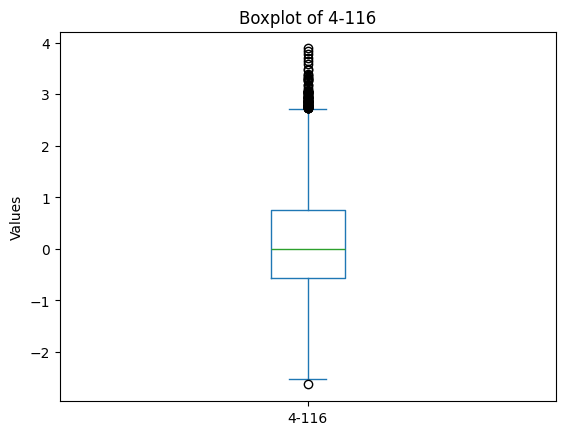

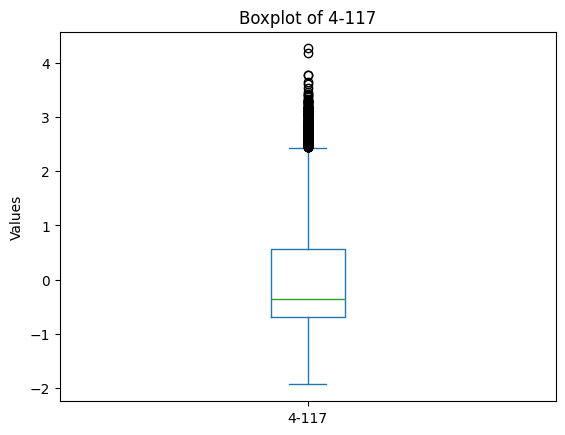

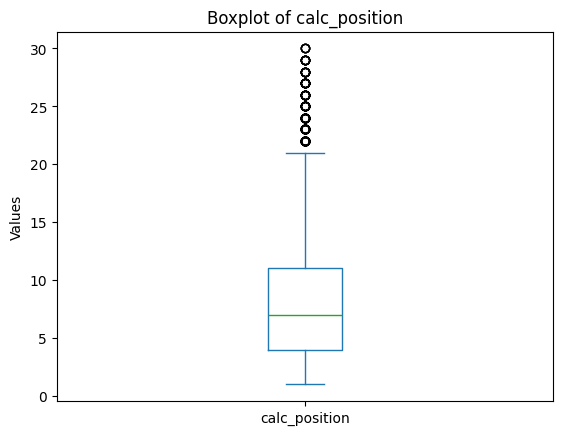

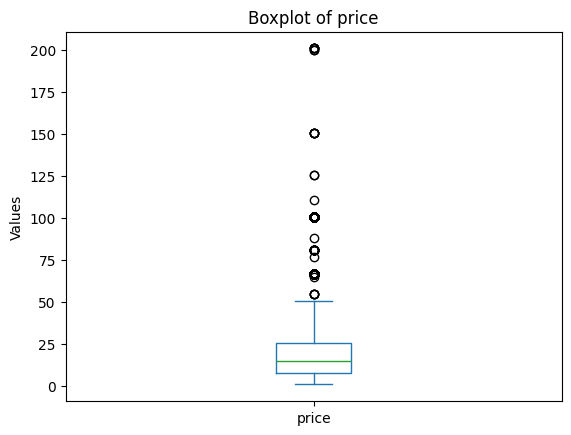

In [17]:
#Checking For Outliers
for column in data.columns:
    plt.figure()  # Create a new figure for each boxplot
    data[column].plot(kind='box')
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')
    plt.show()

In [39]:
#Handling Outliers
def remove_outliers(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

filtered_data = data.copy()
new_data = remove_outliers(filtered_data, column)

Convert Labels into 0 or 1

In [ ]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

Plotting Statistics

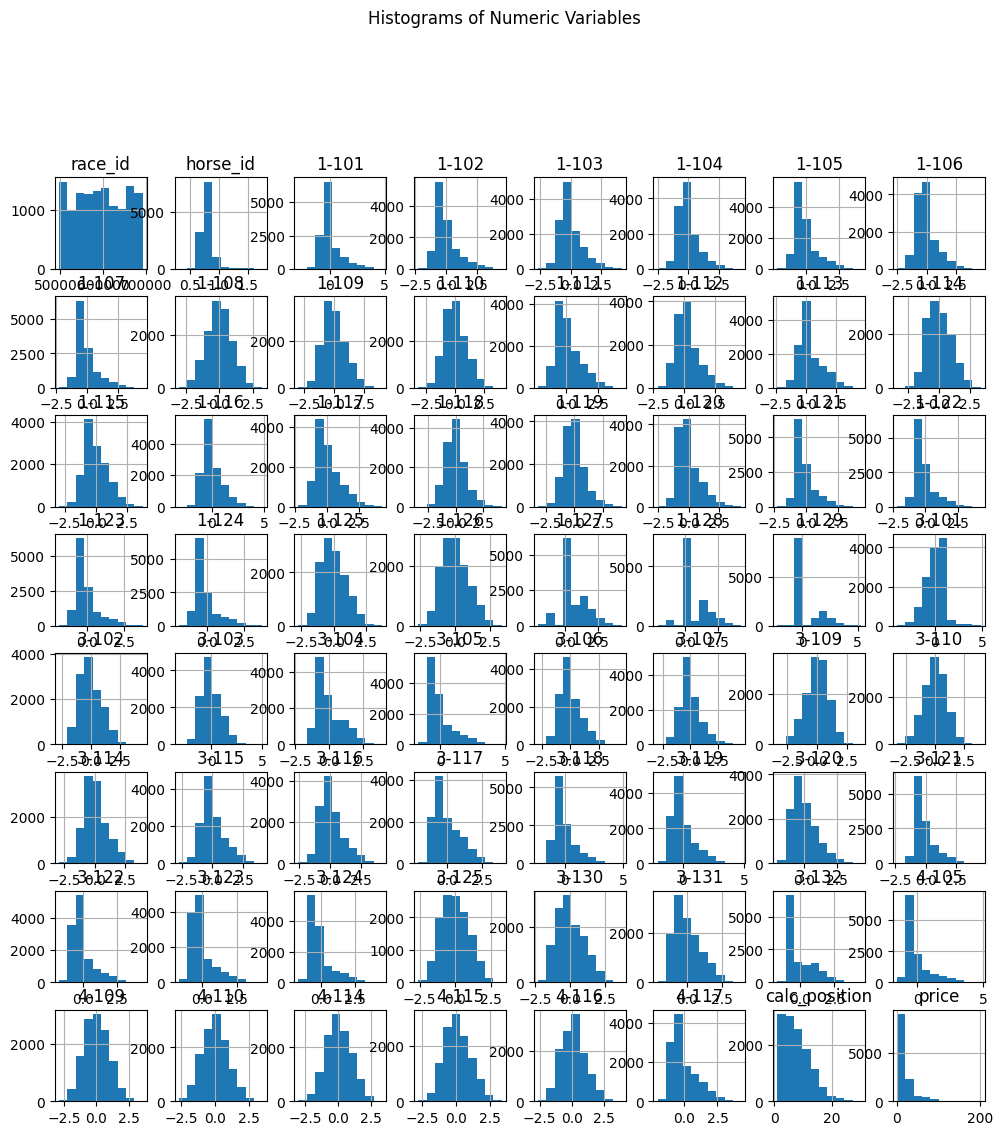

In [49]:
data.hist(figsize=(12, 12))
plt.suptitle('Histograms of Numeric Variables', y=1.02)
plt.show()

Some of the distributions of columns are skewed which may result in biased results etc . It can be solved by scaling the data like using minmax scaler or standard scaler which will help in normalizing the dataset

Implementing One Hot Encoding

In [40]:
one_hot_encoder = OneHotEncoder()
race_id_ = one_hot_encoder.fit_transform(data['race_id'].values.reshape(-1, 1))
horse_id_ = one_hot_encoder.fit_transform(data['horse_id'].values.reshape(-1, 1))


race_id_df = pd.DataFrame(race_id_.toarray(), columns=[f'race_id_{i}' for i in range(race_id_.shape[1])])
horse_id_df = pd.DataFrame(horse_id_.toarray(), columns=[f'horse_id_{i}' for i in range(horse_id_.shape[1])])
new_data.drop(['race_id', 'horse_id'], axis=1, inplace=True)
new_data = pd.concat([data, race_id_df, horse_id_df], axis=1)
new_data.head()

C:\Users\Nimra Amer\AppData\Local\Temp\ipykernel_11508\2372481150.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop(['race_id', 'horse_id'], axis=1, inplace=True)


,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,horse_id_8265,horse_id_8266,horse_id_8267,horse_id_8268,horse_id_8269,horse_id_8270,horse_id_8271,horse_id_8272,horse_id_8273,horse_id_8274
278,497240.0,589032.0,1.10,0.52,0.45,0.35,0.27,1.62,2.23,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,497240.0,658587.0,0.47,0.41,-0.54,0.94,0.78,0.28,-0.17,0.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280,497240.0,669234.0,-0.62,-1.20,-0.64,0.04,-0.27,-0.13,-0.80,-0.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281,497240.0,693225.0,-0.55,-1.19,-1.23,-1.21,-1.09,-1.49,-1.13,-1.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
282,497240.0,693680.0,-0.87,-0.88,-0.75,-0.04,-0.32,-0.22,-0.75,0.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using MLP to train classifier

In [42]:
X = new_data.drop(columns=['calc_position'])
y = new_data['calc_position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [46]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy : " , acc * 100)

Accuracy :  7.246376811594203


In [47]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.11      0.37      0.17        19
         2.0       0.00      0.00      0.00        28
         3.0       0.05      0.09      0.07        22
         4.0       0.02      0.05      0.03        19
         5.0       0.00      0.00      0.00        27
         6.0       0.09      0.11      0.10        28
         7.0       0.12      0.08      0.10        25
         8.0       0.06      0.08      0.07        25
         9.0       0.00      0.00      0.00        19
        10.0       0.10      0.05      0.07        20
        11.0       0.06      0.07      0.06        15
        12.0       0.31      0.28      0.29        18
        13.0       0.00      0.00      0.00        14
        14.0       0.09      0.07      0.08        14
        15.0       0.00      0.00      0.00        12
        16.0       0.00      0.00      0.00         8
        17.0       0.00      0.00      0.00         7
    

c:\Users\Nimra Amer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra Amer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra Amer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a